In [103]:
df = pd.read_csv('flood_risk_dataset_india.csv')

In [104]:
df.isnull().sum()

Latitude                  0
Longitude                 0
Rainfall (mm)             0
Temperature (°C)          0
Humidity (%)              0
River Discharge (m³/s)    0
Water Level (m)           0
Elevation (m)             0
Land Cover                0
Soil Type                 0
Population Density        0
Infrastructure            0
Historical Floods         0
Flood Occurred            0
dtype: int64

In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df.drop(columns=['Flood Occurred'])
y = df['Flood Occurred']

numeric_features = ['Latitude', 'Longitude', 'Rainfall (mm)', 'Temperature (°C)', 'Humidity (%)',
                    'River Discharge (m³/s)', 'Water Level (m)', 'Elevation (m)', 'Population Density']

categorical_features = ['Land Cover', 'Soil Type', 'Infrastructure', 'Historical Floods']


numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

flood_probabilities = pipeline.predict_proba(X)[:, 1]

df['Flood Probability'] = flood_probabilities

df[['Flood Occurred', 'Flood Probability']]

,Flood Occurred,Flood Probability
0,1,0.59
1,0,0.20
2,1,0.78
3,0,0.54
4,0,0.20
...,...,...
9995,0,0.26
9996,0,0.19
9997,1,0.76
9998,1,0.42


In [106]:
df.head()

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Occurred,Flood Probability
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,Water Body,Clay,7276.742184,1,0,1,0.59
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,Forest,Peat,6897.736956,0,1,0,0.20
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,Agricultural,Loam,4361.518494,1,1,1,0.78
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,Desert,Sandy,6163.069701,1,1,0,0.54
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,Agricultural,Loam,6167.964591,1,0,0,0.20


In [107]:
df = df.drop(columns=['Flood Occurred'])

In [108]:
def risk_label(p):
    if p < 0.3:
        return 0  
    elif p < 0.6:
        return 1   
    else:
        return 2   

In [109]:
df['Risk_Label'] = df['Flood Probability'].apply(risk_label)

In [110]:
df

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Probability,Risk_Label
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,Water Body,Clay,7276.742184,1,0,0.59,1
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,Forest,Peat,6897.736956,0,1,0.20,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,Agricultural,Loam,4361.518494,1,1,0.78,2
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,Desert,Sandy,6163.069701,1,1,0.54,1
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,Agricultural,Loam,6167.964591,1,0,0.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32.872024,93.434120,285.682635,37.621017,69.795616,4830.703665,5.943965,2850.197900,Agricultural,Clay,6943.559433,0,0,0.26,0
9996,34.027756,69.357605,224.347263,37.935808,38.095486,1866.199787,9.466158,3314.692947,Forest,Clay,3011.997459,1,0,0.19,0
9997,35.454530,76.807256,5.836759,23.087083,79.919607,1523.374305,9.209185,3377.296962,Desert,Clay,7149.938303,1,0,0.76,2
9998,19.527152,80.856280,120.301453,28.029593,61.680873,2036.812638,2.004644,1146.986151,Water Body,Sandy,906.031452,1,0,0.42,1


In [111]:
df = df.drop(columns=['Flood Probability'])

In [112]:
from sklearn.preprocessing import MinMaxScaler

dynamic_features = [
    'Rainfall (mm)',
    'River Discharge (m³/s)',
    'Water Level (m)',
    'Humidity (%)',
    'Temperature (°C)'
]

target = 'Risk_Label'

In [113]:
scaler = MinMaxScaler()
df[dynamic_features] = scaler.fit_transform(df[dynamic_features])


In [114]:
def create_sliding_windows(df, features, target, window_size):
    X, y = [], []
    for i in range(window_size, len(df) - 1):
        X.append(df[features].iloc[i-window_size:i].values)
        y.append(df[target].iloc[i+1])
    return np.array(X), np.array(y)


In [115]:
WINDOW_SIZE = 6
X, y = create_sliding_windows(df, dynamic_features, target, WINDOW_SIZE)


In [116]:
X.shape

(9993, 6, 5)

In [117]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes=3)

In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [119]:
model = Sequential([
    LSTM(32, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

In [120]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [121]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [122]:
history = model.fit(
    X, y,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    shuffle=False,
    callbacks=[early_stop]
)


Epoch 1/100
250/250 [==============================] - 5s 8ms/step - loss: 1.0486 - accuracy: 0.4301 - val_loss: 1.0404 - val_accuracy: 0.4167
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 1.0472 - accuracy: 0.4201 - val_loss: 1.0402 - val_accuracy: 0.4152
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 1.0468 - accuracy: 0.4152 - val_loss: 1.0404 - val_accuracy: 0.4152
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 1.0463 - accuracy: 0.4128 - val_loss: 1.0404 - val_accuracy: 0.4172
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 1.0452 - accuracy: 0.4209 - val_loss: 1.0402 - val_accuracy: 0.4147
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 1.0455 - accuracy: 0.4211 - val_loss: 1.0402 - val_accuracy: 0.4197
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 1.0452 - accuracy: 0.4251 - val_loss: 1.0399 - val_accuracy: 0.4122

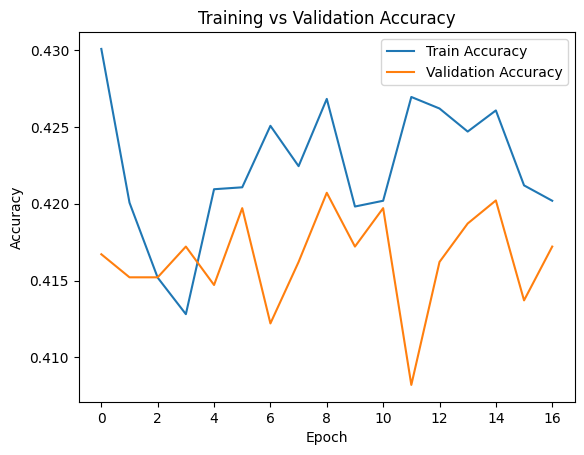

In [123]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'])
plt.title('Training vs Validation Accuracy')
plt.show()


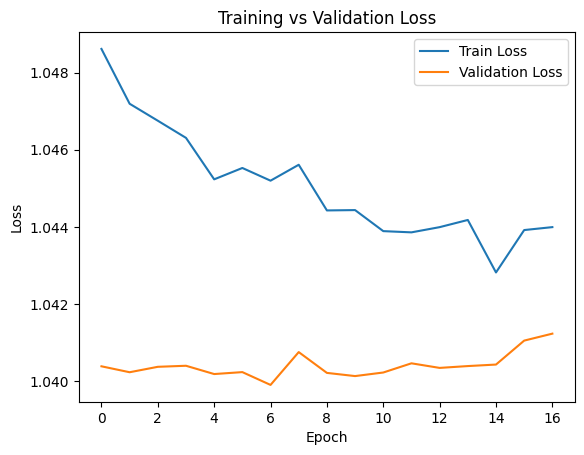

In [124]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Validation Loss'])
plt.title('Training vs Validation Loss')
plt.show()

In [125]:
unique, counts = np.unique(np.argmax(y, axis=1), return_counts=True)
print(dict(zip(['LOW','MEDIUM','HIGH'], counts)))


{'LOW': 3934, 'MEDIUM': 1844, 'HIGH': 4215}


In [126]:
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

model.save('flood_lstm_risk_model.h5')

c:\Users\shash\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
